In [1]:
import dreye
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get dummy LED measurements and a photoreceptor model

In [2]:
sns.set_theme(
    style='ticks', 
    context='talk',
)

In [3]:
wls = np.arange(300, 651)

In [4]:
np.random.seed(10)
peaks = np.linspace(350, 580, 4)
leds = dreye.create_gaussian_spectrum(
    wls, 
    peaks, 
    np.array([7, 10, 18, 25])
)

In [5]:
intensity_bounds=(
    np.zeros(peaks.size), 
    np.array([10, 12, 17, 22])
)
measured_spectra = dreye.create_measured_spectra_container(
    leds,
    names=['uv', 'blue', 'green', 'amber'], 
    intensity_bounds=intensity_bounds, 
    output_bounds=(0, 5)
)

## Spectra of LEDs used for fitting

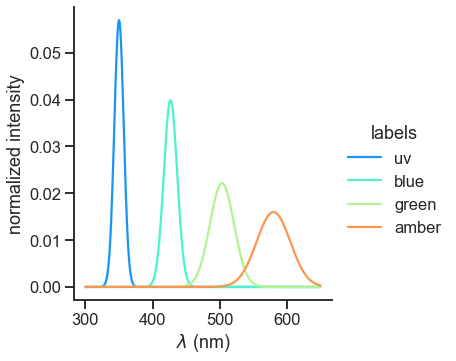

In [16]:
measured_spectra.normalized_spectra.plot(palette='rainbow')
plt.ylabel('normalized intensity')
plt.savefig('selected_LEDs.pdf')

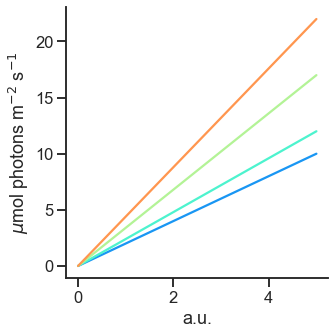

In [18]:
measured_spectra.intensities.plot(palette='rainbow', legend=False)
plt.ylabel(r'$\mu$mol photons m$^{-2}$ s$^{-1}$')
plt.tight_layout()
plt.savefig('selected_light_intensities.pdf')

In [19]:
# intensity range of LEDs
measured_spectra.intensity_bounds

(array([0., 0., 0., 0.]), array([10., 12., 17., 22.]))

## Trichromatic linear photoreceptor model

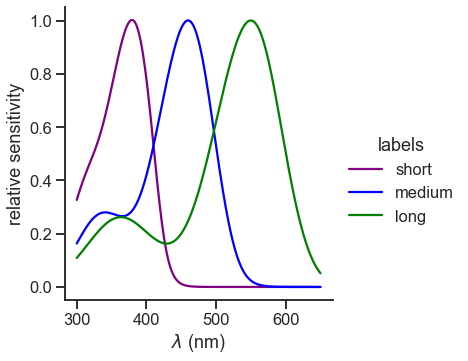

In [20]:
cmap = {'short': 'purple', 'medium': 'blue', 'long': 'green'}
peaks = np.array([380, 460, 550])
sensitivity = dreye.Sensitivity(
    peaks, 
    wls, 
    from_template=True, 
    labels=list(cmap), 
    name='opsins'
)
sensitivity.plot(palette=cmap)

photoreceptor_model = dreye.LinearPhotoreceptor(sensitivity)
plt.ylabel('relative sensitivity')
plt.savefig('selected_animal.pdf')

In [32]:
model = dreye.BestSubstitutionFit(
    photoreceptor_model=photoreceptor_model, 
    measured_spectra=measured_spectra, 
    bg_ints=np.array([2, 3, 1, 1]),
    substitution_type='diff'
    # cp_kwargs={'verbose': True}
)

In [33]:
model.fit(np.array([1, 0, 2]))

BestSubstitutionFit(bg_ints=array([2, 3, 1, 1]),
                    measured_spectra=MeasuredSpectraContainer([[0.0 5.279935916871056e-13 1.0559871833742111e-12 ...  3.695955141809739e-12 4.2239487334968446e-12 4.75194232518395e-12] [0.0 1.4499556203760534e-12 2.899911240752107e-12 ...  1.0149689342632375e-11 1.1599644963008427e-11 1.304960058338448e-11] [0.0 3.90137426885192e-12 7.802748...36 0.007741238603976155 0.008708893429473173] [0.0 0.0008672050365120874 0.0017344100730241748 ...  0.006070435255584612 0.006937640292096699 0.0078048453286087855] [0.0 0.0007759401868838669 0.0015518803737677338 ...  0.005431581308187069 0.006207521495070935 0.0069834616819548015]] microspectral_E_Q),
                    photoreceptor_model=LinearPhotoreceptor('short', 'medium', 'long'))

### Contrast achieved

In [34]:
contrasts = np.round(model.fitted_excite_X_ - model.fitted_other_excite_X_, 2).sum(-1)

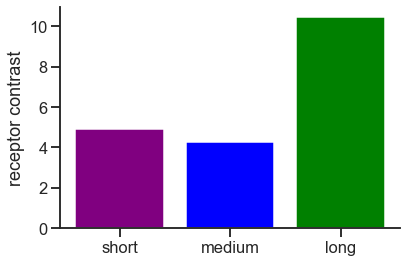

In [35]:
plt.bar(np.arange(3), contrasts, color=cmap.values())
plt.xticks(np.arange(3), cmap)
plt.ylabel('receptor contrast')
sns.despine()
plt.tight_layout()
plt.savefig('contrasts.pdf')

In [12]:
model.fitted_excite_X_

array([[4.28496457, 5.58510637, 3.95004257],
       [8.16694003, 3.11414447, 3.94983058],
       [4.28401992, 3.11343523, 7.06771679]])

In [13]:
model.fitted_other_excite_X_

array([[4.28486457, 0.64252505, 3.94994257],
       [0.41157744, 3.11404447, 3.94993057],
       [4.28411992, 3.11333523, 0.83266284]])

### LED intensity differences

In [14]:
np.round(model.fitted_intensities_ - model.fitted_other_intensities_, 4)

array([[ -3.3048,  12.    ,  17.    , -16.9488],
       [ 10.    ,   7.3894, -17.    ,  10.1072],
       [  3.2959, -12.    ,  15.5992,  22.    ]])

In [16]:
model.fitted_intensities_df_

,,,,,,uv,blue,green,amber
fitted_short,fitted_medium,fitted_long,active,direction,substitution_type,,,,
4.284965,5.585106,3.950043,"(medium,)",max,diff,3.340468e+00,1.200000e+01,1.700000e+01,2.522056e+00
8.166940,3.114144,3.949831,"(short,)",max,diff,1.000000e+01,9.693294e+00,1.222292e-08,1.604734e+01
4.284020,3.113435,7.067717,"(long,)",max,diff,6.639513e+00,2.244088e-10,1.629739e+01,2.200000e+01
4.284865,0.642525,3.949943,"(medium,)",min,diff,6.645293e+00,1.397439e-10,2.069294e-10,1.947090e+01
0.411577,3.114044,3.949931,"(short,)",min,diff,2.388107e-09,2.303926e+00,1.700000e+01,5.940138e+00
4.284120,3.113335,0.832663,"(long,)",min,diff,3.343629e+00,1.200000e+01,6.981952e-01,1.447762e-10


### Compare fit to least-squares algorithm

In [12]:
model2 = dreye.IndependentExcitationFit(
    photoreceptor_model=photoreceptor_model, 
    measured_spectra=measured_spectra, 
    bg_ints=np.array([1, 2, 3, 2]),
)

In [13]:
model2.fit(
    model.fitted_excite_X_
)

IndependentExcitationFit(bg_ints=array([1, 2, 3, 2]),
                         measured_spectra=MeasuredSpectraContainer([[0.0 5.279935916871056e-13 1.0559871833742111e-12 ...  3.695955141809739e-12 4.2239487334968446e-12 4.75194232518395e-12] [0.0 1.4499556203760534e-12 2.899911240752107e-12 ...  1.0149689342632375e-11 1.1599644963008427e-11 1.304960058338448e-11] [0.0 3.90137426885192e-12 7.8...36 0.007741238603976155 0.008708893429473173] [0.0 0.0008672050365120874 0.0017344100730241748 ...  0.006070435255584612 0.006937640292096699 0.0078048453286087855] [0.0 0.0007759401868838669 0.0015518803737677338 ...  0.005431581308187069 0.006207521495070935 0.0069834616819548015]] microspectral_E_Q),
                         photoreceptor_model=LinearPhotoreceptor('short', 'medium', 'long'))

In [14]:
np.round(model2.fitted_intensities_, 4)

array([[1.5507, 0.    , 0.    , 4.9741],
       [0.    , 0.3951, 6.0269, 0.    ],
       [0.3781, 4.2637, 0.    , 0.    ]])

In [15]:
np.round(model.fitted_intensities_, 4)

array([[1.5507, 0.    , 0.    , 4.9742],
       [0.    , 0.3952, 6.0269, 0.    ],
       [0.3781, 4.2638, 0.    , 0.    ]])